In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bole = pd.read_csv('Bole_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
yendi = pd.read_csv('Yendi_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"]) 
Navrongo = pd.read_csv('Navrongo_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])  
Wa= pd.read_csv('Wa_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
Walewale= pd.read_csv('Walewale_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
Tamale = pd.read_csv('Tamale_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])



In [3]:
bole.max()

year     2020.0
month      12.0
day        31.0
Tmax       43.3
dtype: float64

In [4]:

# Step 1: Calculate annual mean Tmax
annual_mean = bole.groupby('year')['Tmax'].mean().reset_index()
annual_mean.columns = ['year', 'mean_Tmax']

# Step 2: Calculate long-term average (mean Tmax for the entire period)
long_term_mean = annual_mean['mean_Tmax'].mean()

# Step 3: Calculate the standard deviation of the annual mean Tmax
std_dev = annual_mean['mean_Tmax'].std()

# Step 4: Calculate the standardized anomaly
annual_mean['standardized_anomaly'] = (annual_mean['mean_Tmax'] - long_term_mean) / std_dev

# Display the results
annual_mean



,year,mean_Tmax,standardized_anomaly
0,1960,32.497022,-0.828436
1,1961,32.970219,0.014551
2,1962,32.198685,-1.359915
3,1963,32.596466,-0.651280
4,1964,32.511257,-0.803077
...,...,...,...
56,2016,33.462186,0.890975
57,2017,33.831808,1.549446
58,2018,32.749973,-0.377812
59,2019,33.014603,0.093619


In [5]:
import pandas as pd

# Define the locations and corresponding file paths
locations = {
    'Bole': 'Bole_1960_2020_dTx_complete.txt',
    'Yendi': 'Yendi_1960_2020_dTx_complete.txt',
    'Navrongo': 'Navrongo_1960_2020_dTx_complete.txt',
    'Wa': 'Wa_1960_2020_dTx_complete.txt',
    'Walewale': 'Walewale_1960_2020_dTx_complete.txt',
    'Tamale': 'Tamale_1960_2020_dTx_complete.txt'
}

# Function to calculate annual mean, long-term mean, and standardized anomaly
def calculate_standardized_anomaly(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
    
    # Step 1: Calculate annual mean Tmax
    annual_mean = data.groupby('year')['Tmax'].mean().reset_index()
    annual_mean.columns = ['year', 'mean_Tmax']
    
    # Step 2: Calculate long-term average (mean Tmax for the entire period)
    long_term_mean = annual_mean['mean_Tmax'].mean()
    
    # Step 3: Calculate the standard deviation of the annual mean Tmax
    std_dev = annual_mean['mean_Tmax'].std()
    
    # Step 4: Calculate the standardized anomaly
    annual_mean['standardized_anomaly'] = (annual_mean['mean_Tmax'] - long_term_mean) / std_dev
    
    return annual_mean

# Dictionary to store the results for each location
results = {}

# Loop through each location and calculate the standardized anomaly
for location, file_path in locations.items():
    results[location] = calculate_standardized_anomaly(file_path)
    # Display the first few rows for each location
    print(f"Results for {location}:")
    print(results[location], "\n")

# # Optionally, save the results to CSV for each location
# for location, df in results.items():
#     df.to_csv(f'{location}_standardized_anomaly.csv', index=False)


Results for Bole:
    year  mean_Tmax  standardized_anomaly
0   1960  32.497022             -0.828436
1   1961  32.970219              0.014551
2   1962  32.198685             -1.359915
3   1963  32.596466             -0.651280
4   1964  32.511257             -0.803077
..   ...        ...                   ...
56  2016  33.462186              0.890975
57  2017  33.831808              1.549446
58  2018  32.749973             -0.377812
59  2019  33.014603              0.093619
60  2020  33.479262              0.921396

[61 rows x 3 columns] 

Results for Yendi:
    year  mean_Tmax  standardized_anomaly
0   1960  33.655000             -0.421281
1   1961  33.627753             -0.474907
2   1962  33.137315             -1.440169
3   1963  33.246000             -1.226260
4   1964  33.363552             -0.994898
..   ...        ...                   ...
56  2016  34.563251              1.366304
57  2017  34.713151              1.661331
58  2018  33.294411             -1.130979
59  2019  33.7

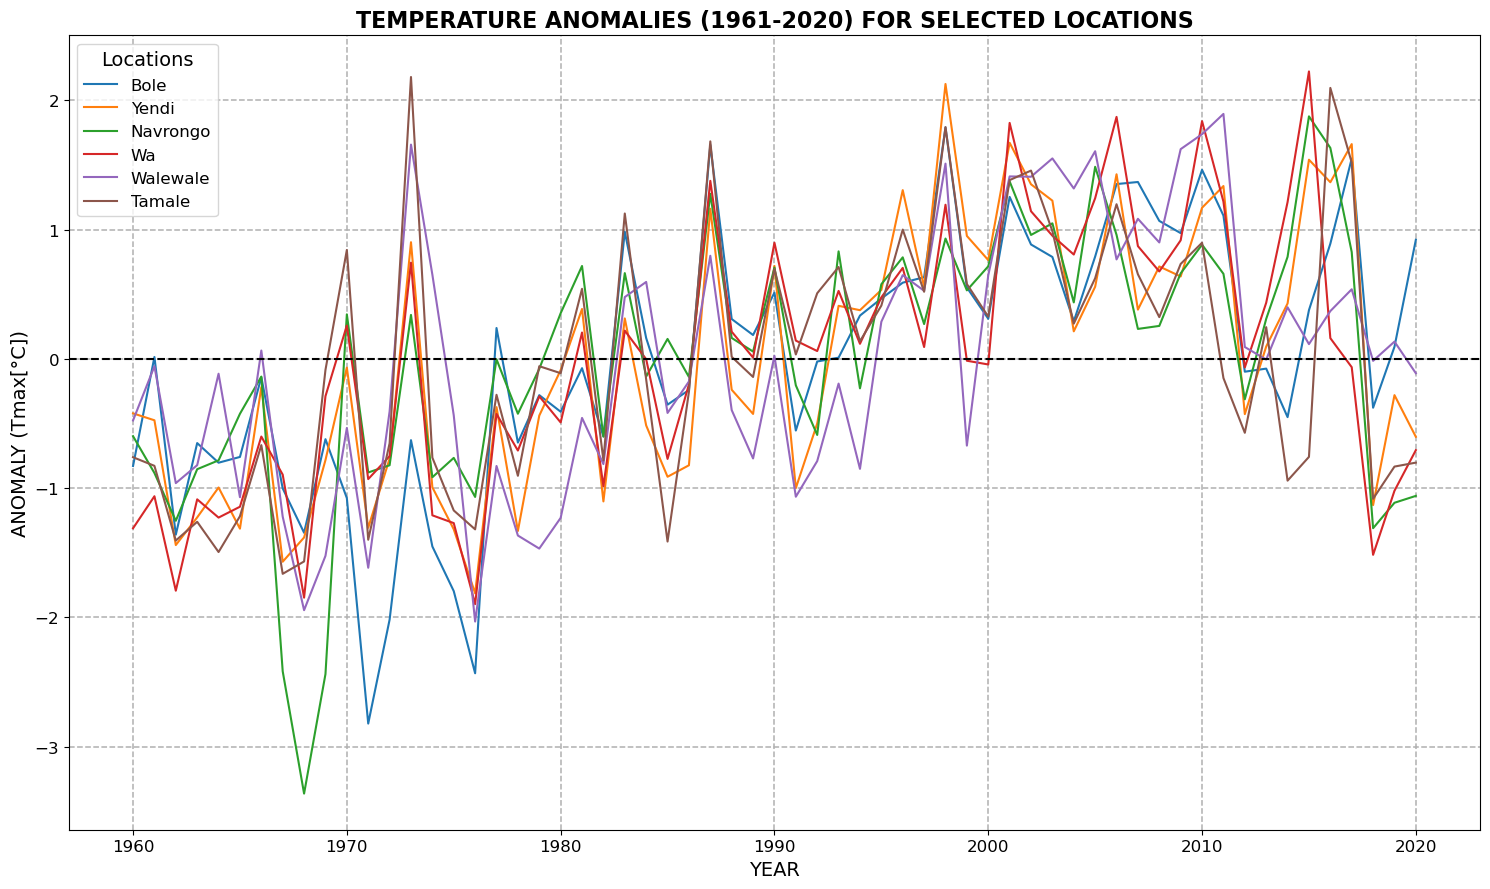

In [7]:
plt.figure(figsize=(15, 9))

# Plot each location
for location, file_path in locations.items():
    # Get the standardized anomaly data
    annual_mean = calculate_standardized_anomaly(file_path)
    
    # Plot the standardized anomalies
    plt.plot(annual_mean['year'], annual_mean['standardized_anomaly'], label=location)

# Add the y=0 horizontal line to represent the long-term mean
plt.axhline(0, color='black', linestyle='--', lw=1.5)


plt.grid(True, which='both', linestyle='--', linewidth=1.1)

# Set plot title and labels with improved font sizes
plt.title('TEMPERATURE ANOMALIES (1961-2020) FOR SELECTED LOCATIONS', fontsize=16, fontweight='bold')
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('ANOMALY (Tmax[°C])', fontsize=14)

# Customize the legend
plt.legend(title='Locations', fontsize=12, title_fontsize=14, loc='upper left')

# Adjust the ticks on the axes for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Apply a tight layout
plt.tight_layout()

# Show the plot
plt.show()


# Labeling the plot
#fig.savefig('anomaly.png',bbox_inches='tight',dpi=500)


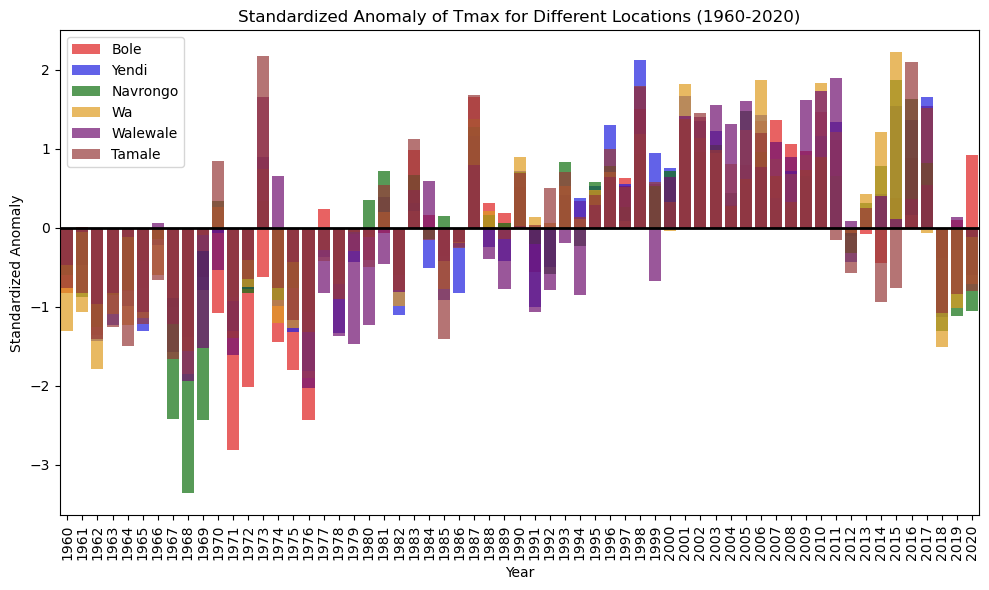

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the locations and corresponding file paths
locations = {
    'Bole': 'Bole_1960_2020_dTx_complete.txt',
    'Yendi': 'Yendi_1960_2020_dTx_complete.txt',
    'Navrongo': 'Navrongo_1960_2020_dTx_complete.txt',
    'Wa': 'Wa_1960_2020_dTx_complete.txt',
    'Walewale': 'Walewale_1960_2020_dTx_complete.txt',
    'Tamale': 'Tamale_1960_2020_dTx_complete.txt'
}

# Function to calculate annual mean, long-term mean, and standardized anomaly
def calculate_standardized_anomaly(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
    
    # Step 1: Calculate annual mean Tmax
    annual_mean = data.groupby('year')['Tmax'].mean().reset_index()
    annual_mean.columns = ['year', 'mean_Tmax']
    
    # Step 2: Calculate long-term average (mean Tmax for the entire period)
    long_term_mean = annual_mean['mean_Tmax'].mean()
    
    # Step 3: Calculate the standard deviation of the annual mean Tmax
    std_dev = annual_mean['mean_Tmax'].std()
    
    # Step 4: Calculate the standardized anomaly
    annual_mean['standardized_anomaly'] = (annual_mean['mean_Tmax'] - long_term_mean) / std_dev
    
    return annual_mean

# Dictionary to store the results for each location
results = {}

# Colors for each location (you can modify the colors as needed)
colors = {
    'Bole': 'red',
    'Yendi': 'blue',
    'Navrongo': 'green',
    'Wa': 'orange',
    'Walewale': 'purple',
    'Tamale': 'brown'
}

# Set up the plotting area
plt.figure(figsize=(10, 6))

# Loop through each location, calculate the standardized anomaly, and plot
for location, file_path in locations.items():
    results[location] = calculate_standardized_anomaly(file_path)
    
    # Create the bar plot for the standardized anomaly
    sns.barplot(
        x='year', 
        y='standardized_anomaly', 
        data=results[location], 
        color=colors[location], 
        label=location, 
        alpha=0.7
    )

# Add a horizontal line at y=0
plt.axhline(0, color='black', linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Standardized Anomaly')
plt.title('Standardized Anomaly of Tmax for Different Locations (1960-2020)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


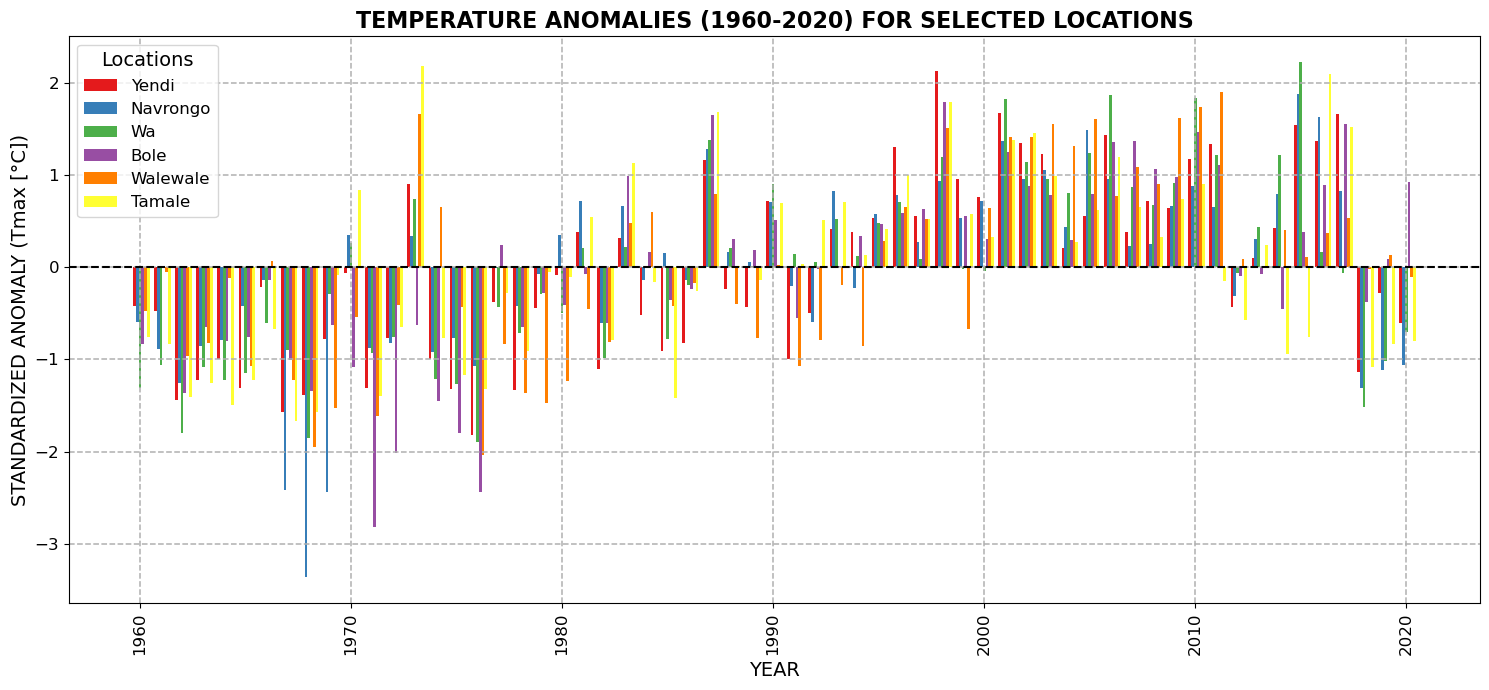

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the results from your previous calculations are stored in dictionaries
results = {
    'Yendi': results['Yendi'],
    'Navrongo': results['Navrongo'],
    'Wa': results['Wa'],
    'Bole': results['Bole'],
    'Walewale': results['Walewale'],
    'Tamale': results['Tamale']
}

# Set a color palette for the plot
sns.set_palette("Set1")

# Create a plot with a figure and axis
plt.figure(figsize=(15, 7))

# Set bar width
width = 0.13

# Extract 'year' and 'standardized_anomaly' from each location's result
years = results['Yendi']['year']  # Assuming years are the same for all locations

# Plot bars for each location with an offset to prevent overlap
plt.bar(years - width*2, results['Yendi']['standardized_anomaly'], width=width, label="Yendi", align='center')
plt.bar(years - width, results['Navrongo']['standardized_anomaly'], width=width, label="Navrongo", align='center')
plt.bar(years, results['Wa']['standardized_anomaly'], width=width, label="Wa", align='center')
plt.bar(years + width, results['Bole']['standardized_anomaly'], width=width, label="Bole", align='center')
plt.bar(years + width*2, results['Walewale']['standardized_anomaly'], width=width, label="Walewale", align='center')
plt.bar(years + width*3, results['Tamale']['standardized_anomaly'], width=width, label="Tamale", align='center')

# Add a horizontal line at y=0 (zero anomaly line)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5)

# Add gridlines to the plot
plt.grid(True, which='both', linestyle='--', linewidth=1.1)

# Set plot title and labels with improved font sizes
plt.title('TEMPERATURE ANOMALIES (1960-2020) FOR SELECTED LOCATIONS', fontsize=16, fontweight='bold')
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('STANDARDIZED ANOMALY (Tmax [°C])', fontsize=14)

# Customize the legend
plt.legend(title='Locations', fontsize=12, title_fontsize=14, loc='upper left')

# Adjust the ticks on the axes for better readability
plt.xticks(fontsize=12, rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Apply a tight layout to ensure no label clipping
plt.tight_layout()

# Show the plot
plt.show()


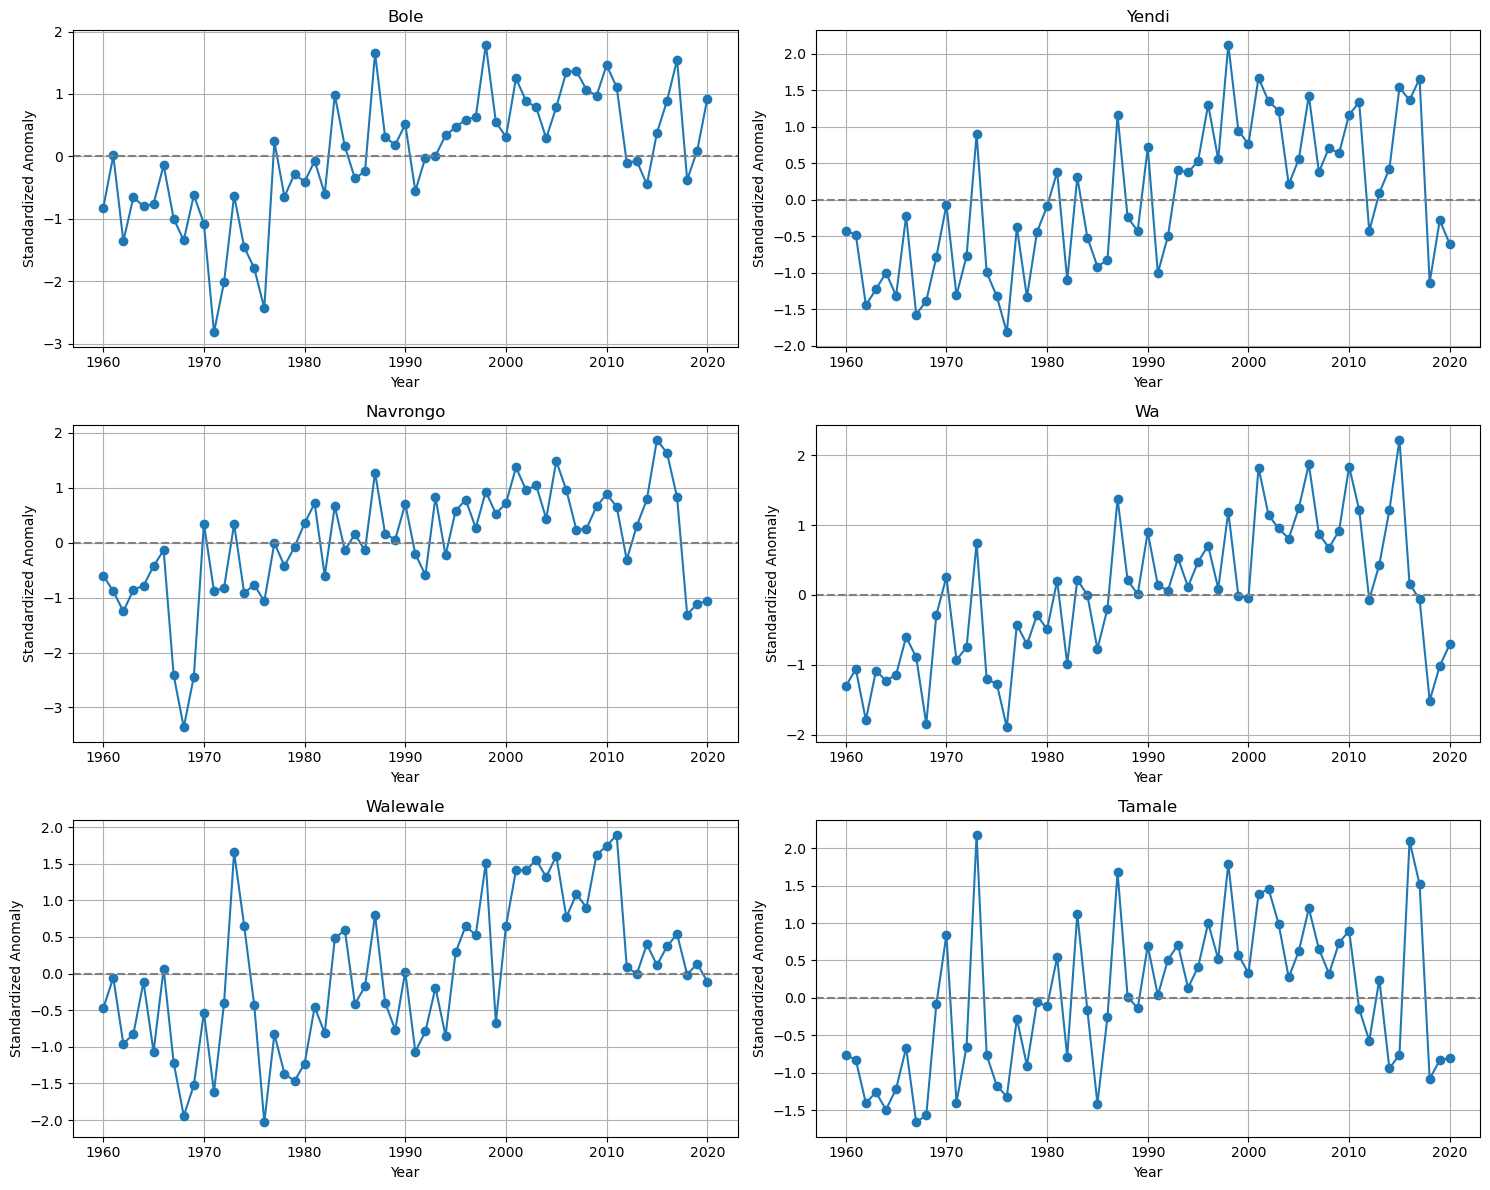

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the locations and corresponding file paths
locations = {
    'Bole': 'Bole_1960_2020_dTx_complete.txt',
    'Yendi': 'Yendi_1960_2020_dTx_complete.txt',
    'Navrongo': 'Navrongo_1960_2020_dTx_complete.txt',
    'Wa': 'Wa_1960_2020_dTx_complete.txt',
    'Walewale': 'Walewale_1960_2020_dTx_complete.txt',
    'Tamale': 'Tamale_1960_2020_dTx_complete.txt'
}

# Function to calculate annual mean, long-term mean, and standardized anomaly
def calculate_standardized_anomaly(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
    
    # Step 1: Calculate annual mean Tmax
    annual_mean = data.groupby('year')['Tmax'].mean().reset_index()
    annual_mean.columns = ['year', 'mean_Tmax']
    
    # Step 2: Calculate long-term average (mean Tmax for the entire period)
    long_term_mean = annual_mean['mean_Tmax'].mean()
    
    # Step 3: Calculate the standard deviation of the annual mean Tmax
    std_dev = annual_mean['mean_Tmax'].std()
    
    # Step 4: Calculate the standardized anomaly
    annual_mean['standardized_anomaly'] = (annual_mean['mean_Tmax'] - long_term_mean) / std_dev
    
    return annual_mean

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each location and calculate the standardized anomaly
for i, (location, file_path) in enumerate(locations.items()):
    data = calculate_standardized_anomaly(file_path)
    
    # Plotting on the respective subplot
    axes[i].plot(data['year'], data['standardized_anomaly'], marker='o', label=f'{location}')
    
    # Adding a horizontal line at y=0
    axes[i].axhline(0, color='gray', linestyle='--', linewidth=1.5)
    
    # Customize the subplot
    axes[i].set_title(f'{location}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Standardized Anomaly')
    axes[i].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the final figure with subplots
plt.show()

# Optionally, save the entire figure
fig.savefig('standardized_anomaly_subplots.png',bbox_inches='tight',dpi=500)


In [15]:
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
# Specify the path to your text file
file_path1 = 'Yendi_1960_2020_dTx_complete.txt'
file_path2 = 'Navrongo_1960_2020_dTx_complete.txt'
file_path3 = 'Wa_1960_2020_dTx_complete.txt'
file_path4 = 'Bole_1960_2020_dTx_complete.txt'
file_path5 = 'Walewale_1960_2020_dTx_complete.txt'
file_path6 = 'Tamale_1960_2020_dTx_complete.txt'


In [17]:
# Read the file into a pandas DataFrame
yendi_1961_1990 = pd.read_csv(file_path1, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[366:11322] 
Navrongo_1961_1990 = pd.read_csv(file_path2, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[366:11322]  
Wa_1961_1990 = pd.read_csv(file_path3, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[366:11322] 
Bole_1961_1990 = pd.read_csv(file_path4, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[366:11322]  
Walewale_1961_1990 = pd.read_csv(file_path5, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[366:11322] 
Tamale_1961_1990 = pd.read_csv(file_path6, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[366:11322]

# Read the file into a pandas DataFrame
yendi_1991_2020 = pd.read_csv(file_path1, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[11323:22280] 
Navrongo_1991_2020 = pd.read_csv(file_path2, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[11323:22280]  
Wa_1991_2020 = pd.read_csv(file_path3, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[11323:22280] 
Bole_1991_2020 = pd.read_csv(file_path4, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[11323:22280]  
Walewale_1991_2020 = pd.read_csv(file_path5, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[11323:22280] 
Tamale_1991_2020 = pd.read_csv(file_path6, delim_whitespace=True, header=None, names=["year", "month", "day", "Tmax"]).loc[11323:22280]


In [19]:
month = ['JAN','FEB','MAR','APR','MAY','JUNE','JULY','AUG','SEPT','OCT','NOV','DEC']

In [20]:
#FIRST WINDOW
monthly_yendi_1961_1990 = yendi_1961_1990.groupby('month')['Tmax'].mean().reset_index()
monthly_Navrongo_1961_1990 = Navrongo_1961_1990.groupby('month')['Tmax'].mean().reset_index()
monthly_Wa_1961_1990 = Wa_1961_1990.groupby('month')['Tmax'].mean().reset_index()
monthly_Bole_1961_1990 = Bole_1961_1990.groupby('month')['Tmax'].mean().reset_index()
monthly_Walewale_1961_1990 = Walewale_1961_1990.groupby('month')['Tmax'].mean().reset_index()
monthly_Tamale_1961_1990 = Tamale_1961_1990.groupby('month')['Tmax'].mean().reset_index()


#SECOND WINDOW
monthly_yendi_1991_2020 = yendi_1991_2020.groupby('month')['Tmax'].mean().reset_index()
monthly_Navrongo_1991_2020 = Navrongo_1991_2020.groupby('month')['Tmax'].mean().reset_index()
monthly_Wa_1991_2020 = Wa_1991_2020.groupby('month')['Tmax'].mean().reset_index()
monthly_Bole_1991_2020 = Bole_1991_2020.groupby('month')['Tmax'].mean().reset_index()
monthly_Walewale_1991_2020 = Walewale_1991_2020.groupby('month')['Tmax'].mean().reset_index()
monthly_Tamale_1991_2020 = Tamale_1991_2020.groupby('month')['Tmax'].mean().reset_index()

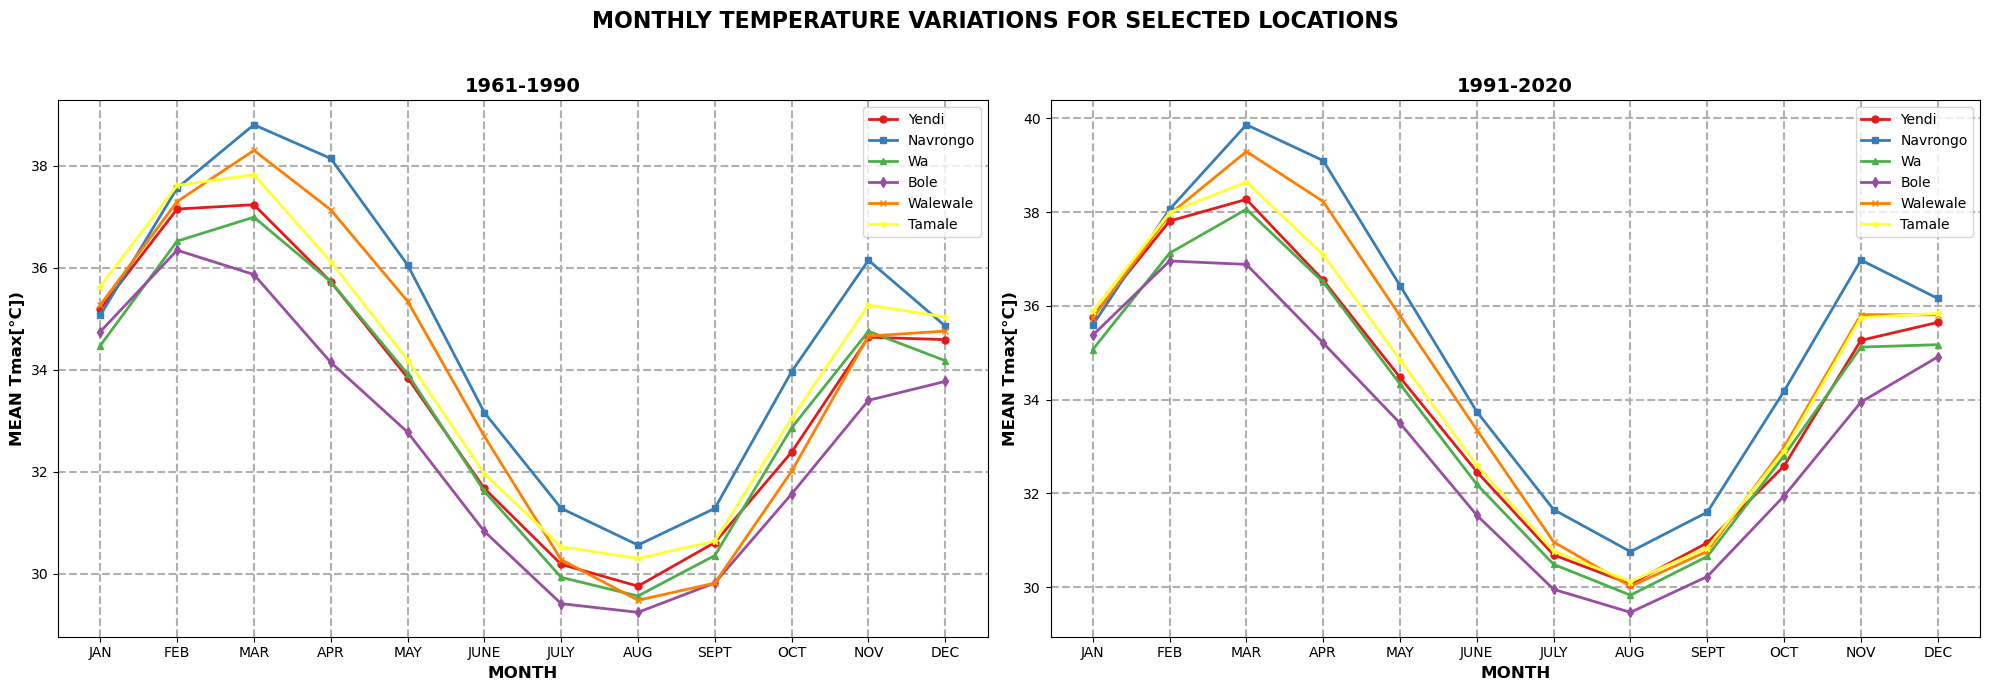

In [21]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Set a suptitle for the whole figure
fig.suptitle('MONTHLY TEMPERATURE VARIATIONS FOR SELECTED LOCATIONS', fontsize=16, fontweight='bold')

# 1st subplot: Anomalies for 1961-1990
axs[0].plot(month, monthly_yendi_1961_1990['Tmax'], label="Yendi", marker='o', markersize=5, linewidth=2)
axs[0].plot(month, monthly_Navrongo_1961_1990['Tmax'], label="Navrongo", marker='s', markersize=5, linewidth=2)
axs[0].plot(month, monthly_Wa_1961_1990['Tmax'], label="Wa", marker='^', markersize=5, linewidth=2)
axs[0].plot(month, monthly_Bole_1961_1990['Tmax'], label="Bole", marker='d', markersize=5, linewidth=2)
axs[0].plot(month, monthly_Walewale_1961_1990['Tmax'], label="Walewale", marker='x', markersize=5, linewidth=2)
axs[0].plot(month, monthly_Tamale_1961_1990['Tmax'], label="Tamale", marker='*', markersize=5, linewidth=2)

# Add a horizontal line at y=0 (zero anomaly line)


# Set title and labels for the first subplot
axs[0].set_title('1961-1990', fontsize=14, fontweight='bold')
axs[0].set_xlabel('MONTH', fontsize=12, fontweight='bold')
axs[0].set_ylabel('MEAN Tmax[°C])', fontsize=12, fontweight='bold')
axs[0].grid(True, which='both', linestyle='--', linewidth=1.5)
axs[0].legend(loc='best')

# Rotate and customize ticks for the first subplot
# axs[0].tick_params(axis='x',  size=10, weight='bold')
# axs[0].tick_params(axis='y', size=10, weight='bold')

# 2nd subplot: Anomalies for 1991-2020
axs[1].plot(month, monthly_yendi_1991_2020['Tmax'], label="Yendi", marker='o', markersize=5, linewidth=2)
axs[1].plot(month, monthly_Navrongo_1991_2020['Tmax'], label="Navrongo", marker='s', markersize=5, linewidth=2)
axs[1].plot(month, monthly_Wa_1991_2020['Tmax'], label="Wa", marker='^', markersize=5, linewidth=2)
axs[1].plot(month, monthly_Bole_1991_2020['Tmax'], label="Bole", marker='d', markersize=5, linewidth=2)
axs[1].plot(month, monthly_Walewale_1991_2020['Tmax'], label="Walewale", marker='x', markersize=5, linewidth=2)
axs[1].plot(month, monthly_Tamale_1991_2020['Tmax'], label="Tamale", marker='*', markersize=5, linewidth=2)


# Set title and labels for the second subplot
axs[1].set_title('1991-2020', fontsize=14, fontweight='bold')
axs[1].set_xlabel('MONTH', fontsize=12, fontweight='bold')
axs[1].set_ylabel('MEAN Tmax[°C])', fontsize=12, fontweight='bold')
axs[1].grid(True, which='both', linestyle='--', linewidth=1.5)
axs[1].legend(loc='best')

# # Rotate and customize ticks for the second subplot
# axs[1].tick_params(axis='x', rotation=90, size=10, weight='bold')
# axs[1].tick_params(axis='y', size=10, weight='bold')

# Apply a tight layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusting for suptitle
plt.show()


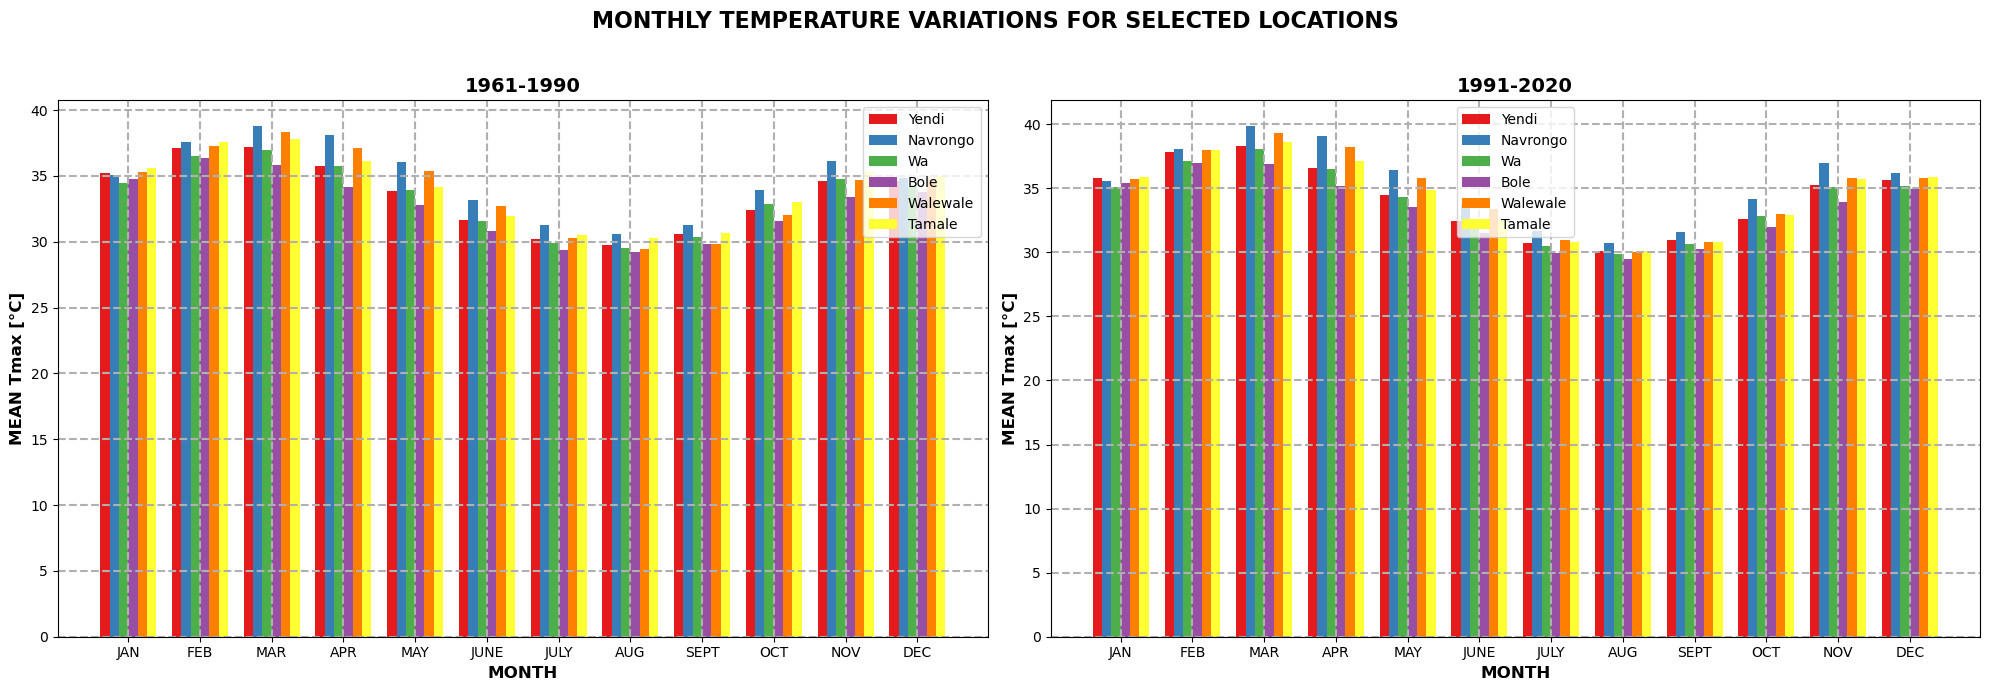

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'month' is an array-like structure, converting it to numeric for bar positioning
month_indices = np.arange(len(month))  # Assuming month is an array-like of length 12 (for each month)

# Define bar width for better visibility
width = 0.13

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Set a suptitle for the whole figure
fig.suptitle('MONTHLY TEMPERATURE VARIATIONS FOR SELECTED LOCATIONS', fontsize=16, fontweight='bold')

# 1st subplot: Anomalies for 1961-1990
axs[0].bar(month_indices - width*2.5, monthly_yendi_1961_1990['Tmax'], width=width, label="Yendi", align='center')
axs[0].bar(month_indices - width*1.5, monthly_Navrongo_1961_1990['Tmax'], width=width, label="Navrongo", align='center')
axs[0].bar(month_indices - width*0.5, monthly_Wa_1961_1990['Tmax'], width=width, label="Wa", align='center')
axs[0].bar(month_indices + width*0.5, monthly_Bole_1961_1990['Tmax'], width=width, label="Bole", align='center')
axs[0].bar(month_indices + width*1.5, monthly_Walewale_1961_1990['Tmax'], width=width, label="Walewale", align='center')
axs[0].bar(month_indices + width*2.5, monthly_Tamale_1961_1990['Tmax'], width=width, label="Tamale", align='center')

# Set title and labels for the first subplot
axs[0].set_title('1961-1990', fontsize=14, fontweight='bold')
axs[0].set_xlabel('MONTH', fontsize=12, fontweight='bold')
axs[0].set_ylabel('MEAN Tmax [°C]', fontsize=12, fontweight='bold')
axs[0].grid(True, which='both', linestyle='--', linewidth=1.5)
axs[0].legend(loc='best')

# Set custom ticks for x-axis with month names if needed
axs[0].set_xticks(month_indices)
axs[0].set_xticklabels(month, fontsize=10)

# 2nd subplot: Anomalies for 1991-2020
axs[1].bar(month_indices - width*2.5, monthly_yendi_1991_2020['Tmax'], width=width, label="Yendi", align='center')
axs[1].bar(month_indices - width*1.5, monthly_Navrongo_1991_2020['Tmax'], width=width, label="Navrongo", align='center')
axs[1].bar(month_indices - width*0.5, monthly_Wa_1991_2020['Tmax'], width=width, label="Wa", align='center')
axs[1].bar(month_indices + width*0.5, monthly_Bole_1991_2020['Tmax'], width=width, label="Bole", align='center')
axs[1].bar(month_indices + width*1.5, monthly_Walewale_1991_2020['Tmax'], width=width, label="Walewale", align='center')
axs[1].bar(month_indices + width*2.5, monthly_Tamale_1991_2020['Tmax'], width=width, label="Tamale", align='center')

# Set title and labels for the second subplot
axs[1].set_title('1991-2020', fontsize=14, fontweight='bold')
axs[1].set_xlabel('MONTH', fontsize=12, fontweight='bold')
axs[1].set_ylabel('MEAN Tmax [°C]', fontsize=12, fontweight='bold')
axs[1].grid(True, which='both', linestyle='--', linewidth=1.5)
axs[1].legend(loc='best')

# Set custom ticks for x-axis with month names if needed
axs[1].set_xticks(month_indices)
axs[1].set_xticklabels(month, fontsize=10)

# Apply a tight layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusting for suptitle
plt.show()
